<a href="https://colab.research.google.com/github/SelvaNarmatha/PRODIGY_DS_TASK3/blob/main/Task3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, ConfusionMatrixDisplay

In [2]:
bank = pd.read_csv("bank.csv",sep=';')

In [3]:
bank.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [4]:
bank.shape

(36959, 21)

In [5]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36959 entries, 0 to 36958
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             36959 non-null  int64  
 1   job             36959 non-null  object 
 2   marital         36959 non-null  object 
 3   education       36959 non-null  object 
 4   default         36959 non-null  object 
 5   housing         36959 non-null  object 
 6   loan            36959 non-null  object 
 7   contact         36959 non-null  object 
 8   month           36959 non-null  object 
 9   day_of_week     36959 non-null  object 
 10  duration        36959 non-null  int64  
 11  campaign        36959 non-null  int64  
 12  pdays           36959 non-null  int64  
 13  previous        36959 non-null  int64  
 14  poutcome        36959 non-null  object 
 15  emp.var.rate    36959 non-null  float64
 16  cons.price.idx  36959 non-null  float64
 17  cons.conf.idx   36959 non-null 

In [6]:
bank.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,36959.000000,36959.000000,36959.000000,36959.000000,36959.000000,36959.000000,36959.000000,36959.000000,36959.000000,36959.000000
mean,39.653562,254.813929,2.650207,989.697881,0.099732,0.362669,93.617336,-41.129625,3.943194,5184.267139
std,9.452245,260.052563,2.879095,95.690790,0.317363,1.378397,0.517770,3.981914,1.530319,52.667798
min,18.000000,0.000000,1.000000,0.000000,0.000000,-2.900000,92.469000,-50.000000,1.072000,5076.200000
25%,32.000000,99.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.811000,5099.100000
50%,38.000000,175.000000,2.000000,999.000000,0.000000,1.100000,93.918000,-42.000000,4.858000,5195.800000
75%,47.000000,314.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.962000,5228.100000
max,95.000000,4918.000000,56.000000,999.000000,4.000000,1.400000,94.465000,-33.600000,5.045000,5228.100000


In [7]:
bank.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,36959.000000,36959.000000,36959.000000,36959.000000,36959.000000,36959.000000,36959.000000,36959.000000,36959.000000,36959.000000
mean,39.653562,254.813929,2.650207,989.697881,0.099732,0.362669,93.617336,-41.129625,3.943194,5184.267139
std,9.452245,260.052563,2.879095,95.690790,0.317363,1.378397,0.517770,3.981914,1.530319,52.667798
min,18.000000,0.000000,1.000000,0.000000,0.000000,-2.900000,92.469000,-50.000000,1.072000,5076.200000
25%,32.000000,99.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.811000,5099.100000
50%,38.000000,175.000000,2.000000,999.000000,0.000000,1.100000,93.918000,-42.000000,4.858000,5195.800000
75%,47.000000,314.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.962000,5228.100000
max,95.000000,4918.000000,56.000000,999.000000,4.000000,1.400000,94.465000,-33.600000,5.045000,5228.100000


In [8]:
bank.describe(include='object')

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y
count,36959,36959,36959,36959,36959,36959,36959,36959,36959,36959,36958
unique,12,4,8,3,3,3,2,9,5,3,2
top,admin.,married,university.degree,no,yes,no,cellular,may,thu,nonexistent,no
freq,9116,22687,10495,28459,19263,30419,22549,13557,7728,33467,34252


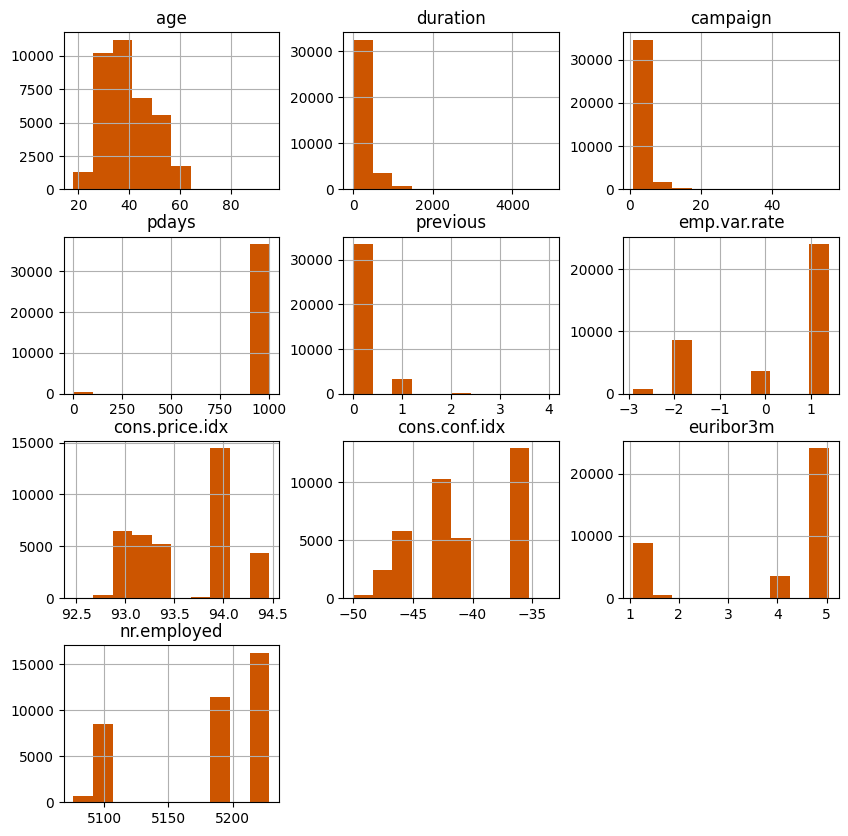

In [9]:
bank.hist(figsize=(10,10),color='#cc5500')
plt.show()

In [10]:
bank.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 1
dtype: int64

In [11]:
bank.duplicated().sum()

11

In [12]:
bank[bank.duplicated()]

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
1266,39,blue-collar,married,basic.6y,no,no,no,telephone,may,thu,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
12261,36,retired,married,unknown,no,no,no,telephone,jul,thu,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.966,5228.1,no
14234,27,technician,single,professional.course,no,no,no,cellular,jul,mon,...,2,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
16956,47,technician,divorced,high.school,no,yes,no,cellular,jul,thu,...,3,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
18465,32,technician,single,professional.course,no,yes,no,cellular,jul,thu,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.968,5228.1,no
20216,55,services,married,high.school,unknown,no,no,cellular,aug,mon,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.965,5228.1,no
20534,41,technician,married,professional.course,no,yes,no,cellular,aug,tue,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.966,5228.1,no
25217,39,admin.,married,university.degree,no,no,no,cellular,nov,tue,...,2,999,0,nonexistent,-0.1,93.200,-42.0,4.153,5195.8,no
28477,24,services,single,high.school,no,yes,no,cellular,apr,tue,...,1,999,0,nonexistent,-1.8,93.075,-47.1,1.423,5099.1,no
32516,35,admin.,married,university.degree,no,yes,no,cellular,may,fri,...,4,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no


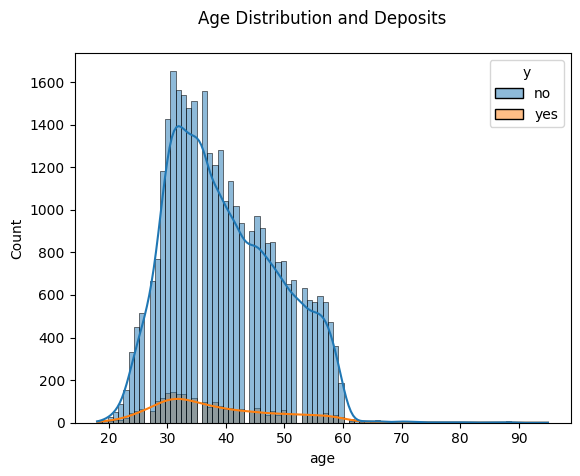

In [13]:
sns.histplot(x="age", data=bank, kde=True, hue= "y")
plt.title("Age Distribution and Deposits\n")
plt.show()

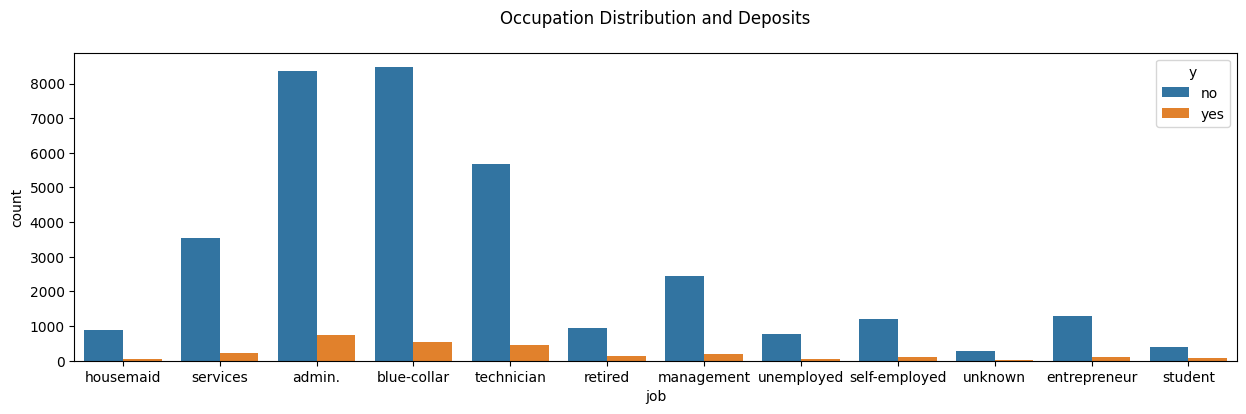

In [14]:
plt.figure(figsize=(15,4))
sns.countplot(x="job", data= bank, hue ="y")
plt.title("Occupation Distribution and Deposits\n")
plt.show()

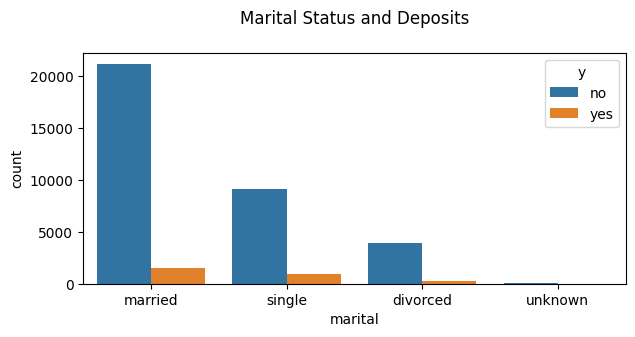

In [15]:
plt.figure(figsize=(7,3))
sns.countplot(x="marital", data= bank, hue ="y")
plt.title("Marital Status and Deposits\n")
plt.show()

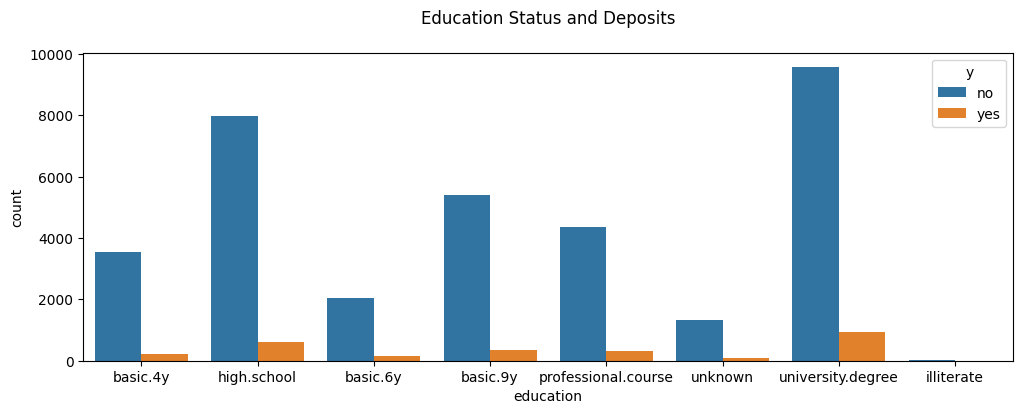

In [16]:
plt.figure(figsize=(12,4))
sns.countplot(x="education", data= bank, hue ="y")
plt.title("Education Status and Deposits\n")
plt.show()

In [17]:
bank.default.value_counts()

default
no         28459
unknown     8497
yes            3
Name: count, dtype: int64

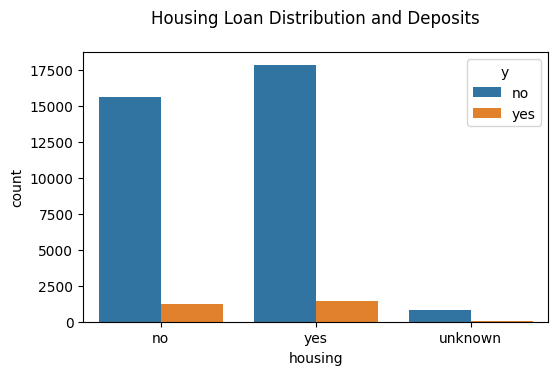

In [18]:
plt.figure(figsize=(6,3.5))
sns.countplot(x="housing", data= bank, hue ="y")
plt.title("Housing Loan Distribution and Deposits\n")
plt.show()

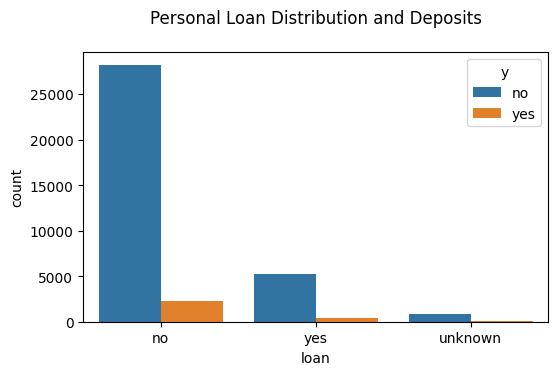

In [19]:
plt.figure(figsize=(6,3.5))
sns.countplot(x="loan", data= bank, hue ="y")
plt.title("Personal Loan Distribution and Deposits\n")
plt.show()

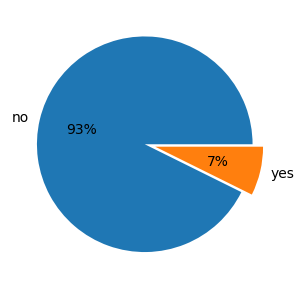

In [20]:
bank.y.value_counts()
keys = bank.y.value_counts().index
data = bank.y.value_counts().values
plt.figure(figsize=(6,3.5))
explode = [0,0.1]
plt.pie(data,labels=keys,explode=explode, autopct='%.0f%%')
plt.show()

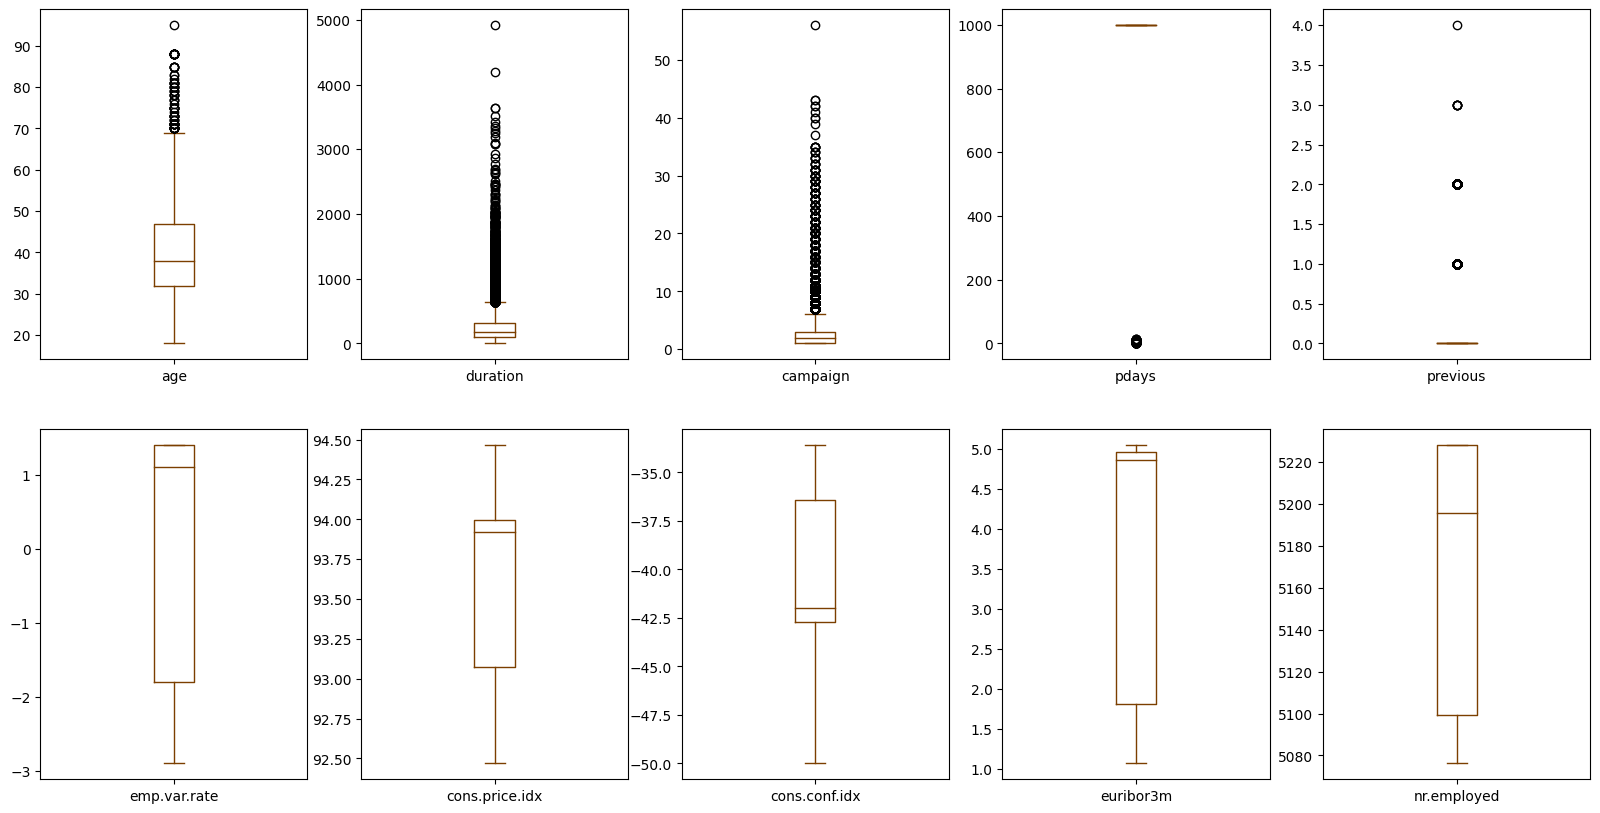

In [21]:
bank.plot(kind='box', subplots=True, layout=(2,5),figsize=(20,10),color='#7b3f00')
plt.show()

In [22]:
cols = bank.select_dtypes("object").columns
cols

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome', 'y'],
      dtype='object')

In [23]:
le = LabelEncoder()
bank[cols] = bank[cols].apply(le.fit_transform)

In [24]:
bank.head(3)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,3,1,0,0,0,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
1,57,7,1,3,1,0,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
2,37,7,1,3,0,2,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0


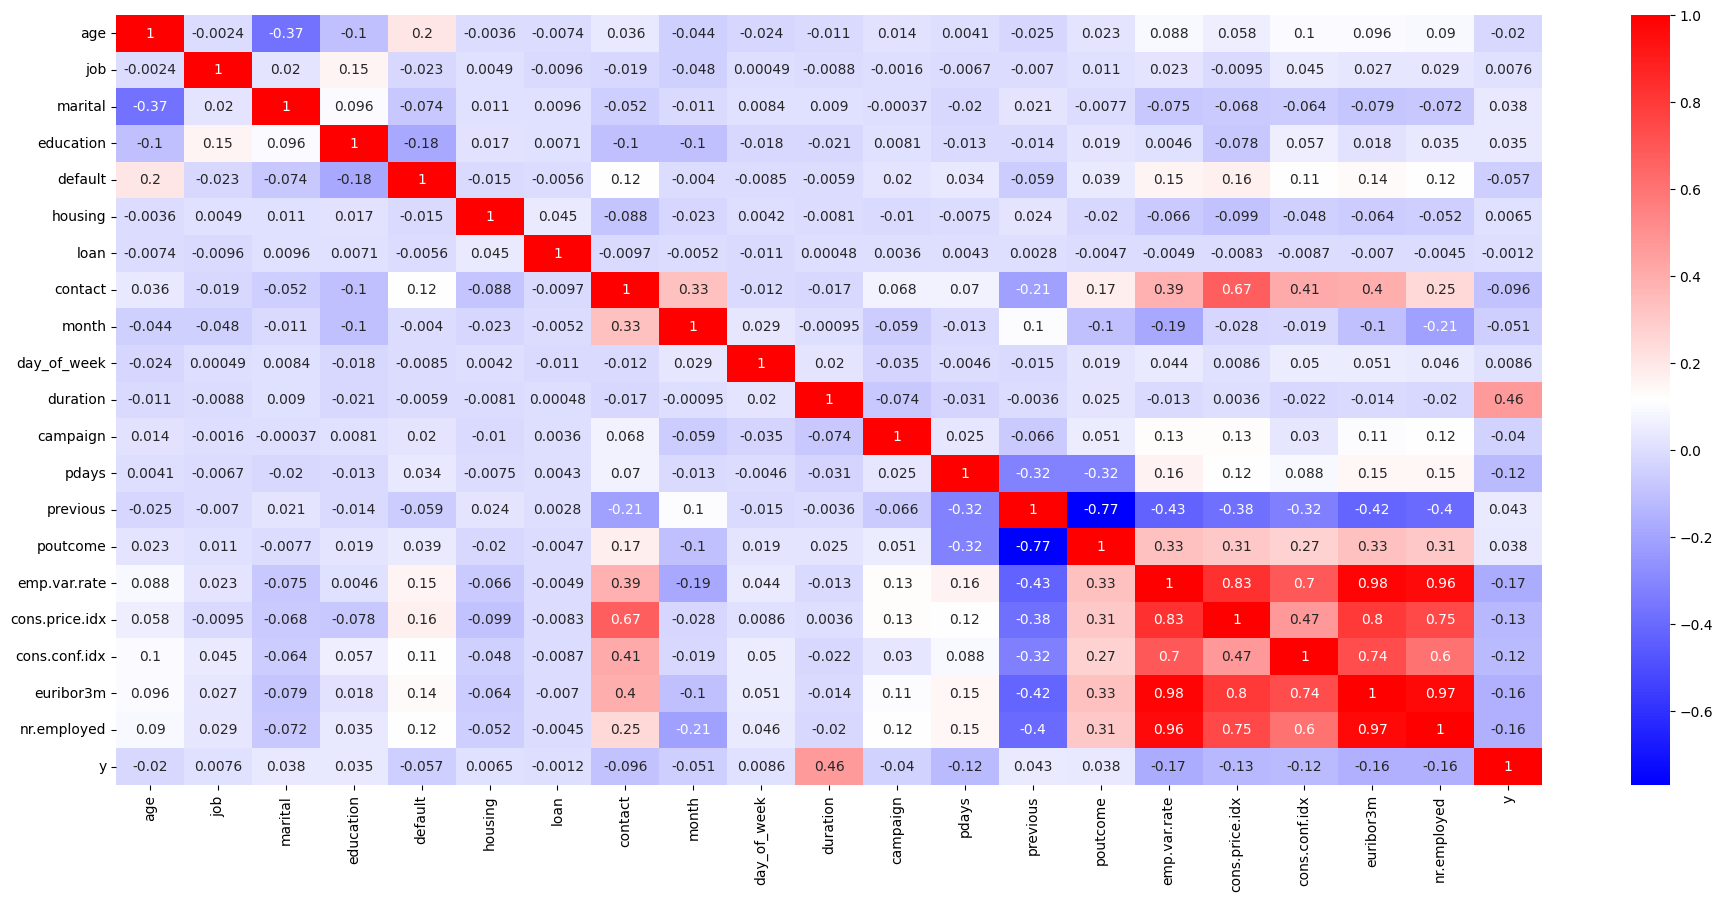

In [25]:
plt.figure(figsize=(23,10))
sns.heatmap(bank.corr(), cmap='bwr', annot=True)
plt.show()

In [26]:
X = bank.drop("y", axis=1)
y = bank.y

In [27]:
scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns = X.columns)

In [28]:
train_X, test_X, train_y, test_y = train_test_split(X_scaled, y, test_size=0.3)

In [29]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(train_X, train_y)

DecisionTreeClassifier()

In [30]:
print('Train Score: {}'.format(decision_tree.score(train_X, train_y)))
print('Test Score: {}'.format(decision_tree.score(test_X, test_y)))

Train Score: 1.0
Test Score: 0.9120670995670995


In [32]:
cross_val_score(decision_tree, train_X, train_y, cv=5).mean

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


<function ndarray.mean>

In [33]:
ypred = decision_tree.predict(test_X)
print(classification_report(test_y,ypred))

              precision    recall  f1-score   support

           0       0.96      0.95      0.95     10283
           1       0.40      0.43      0.42       805

    accuracy                           0.91     11088
   macro avg       0.68      0.69      0.69     11088
weighted avg       0.92      0.91      0.91     11088



In [34]:
param_grid = {
    'max_depth': [3, 5, 7,10, None],
    'criterion' : ['gini', 'entropy'],
    'min_samples_leaf': [3, 5, 7, 9,10,20]
    }

In [35]:
gscv = GridSearchCV(decision_tree, param_grid, cv=5, verbose=1)
gscv.fit(train_X, train_y)

Fitting 5 folds for each of 60 candidates, totalling 300 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 7, 10, None],
                         'min_samples_leaf': [3, 5, 7, 9, 10, 20]},
             verbose=1)

In [36]:
gscv = GridSearchCV(decision_tree, param_grid, cv=5, verbose=1)
gscv.fit(train_X, train_y)

Fitting 5 folds for each of 60 candidates, totalling 300 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 7, 10, None],
                         'min_samples_leaf': [3, 5, 7, 9, 10, 20]},
             verbose=1)

In [37]:
gscv.best_params_

{'criterion': 'gini', 'max_depth': 7, 'min_samples_leaf': 10}

In [38]:
gscv.best_estimator_

DecisionTreeClassifier(max_depth=7, min_samples_leaf=10)

In [39]:
cross_val_score(gscv.best_estimator_, train_X, train_y, cv=5).mean()


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


0.9365313150666003

In [40]:
clf = DecisionTreeClassifier(criterion= 'gini', max_depth= 5, min_samples_leaf = 3)
clf.fit(train_X, train_y)

DecisionTreeClassifier(max_depth=5, min_samples_leaf=3)

In [41]:
print('Train Score: {}'.format(clf.score(train_X, train_y)))
print('Test Score: {}'.format(clf.score(test_X, test_y)))

Train Score: 0.940937729504078
Test Score: 0.9354256854256854


In [42]:
pred_y = clf.predict(test_X)

ValueError: The number of FixedLocator locations (2), usually from a call to set_ticks, does not match the number of labels (3).

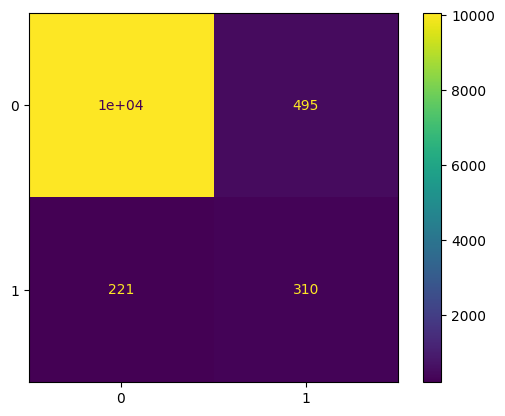

In [44]:
cm = confusion_matrix(pred_y, test_y)
ConfusionMatrixDisplay(cm, display_labels=clf.classes_).plot()
plt.show()

In [45]:
print(classification_report(pred_y, test_y))

              precision    recall  f1-score   support

           0       0.98      0.95      0.97     10557
           1       0.39      0.58      0.46       531

    accuracy                           0.94     11088
   macro avg       0.68      0.77      0.71     11088
weighted avg       0.95      0.94      0.94     11088



In [46]:
accuracy = accuracy_score(test_y,pred_y)
print("Test Accuracy of Decision Tree Classifier : {}".format(accuracy*100))

Test Accuracy of Decision Tree Classifier : 93.54256854256853


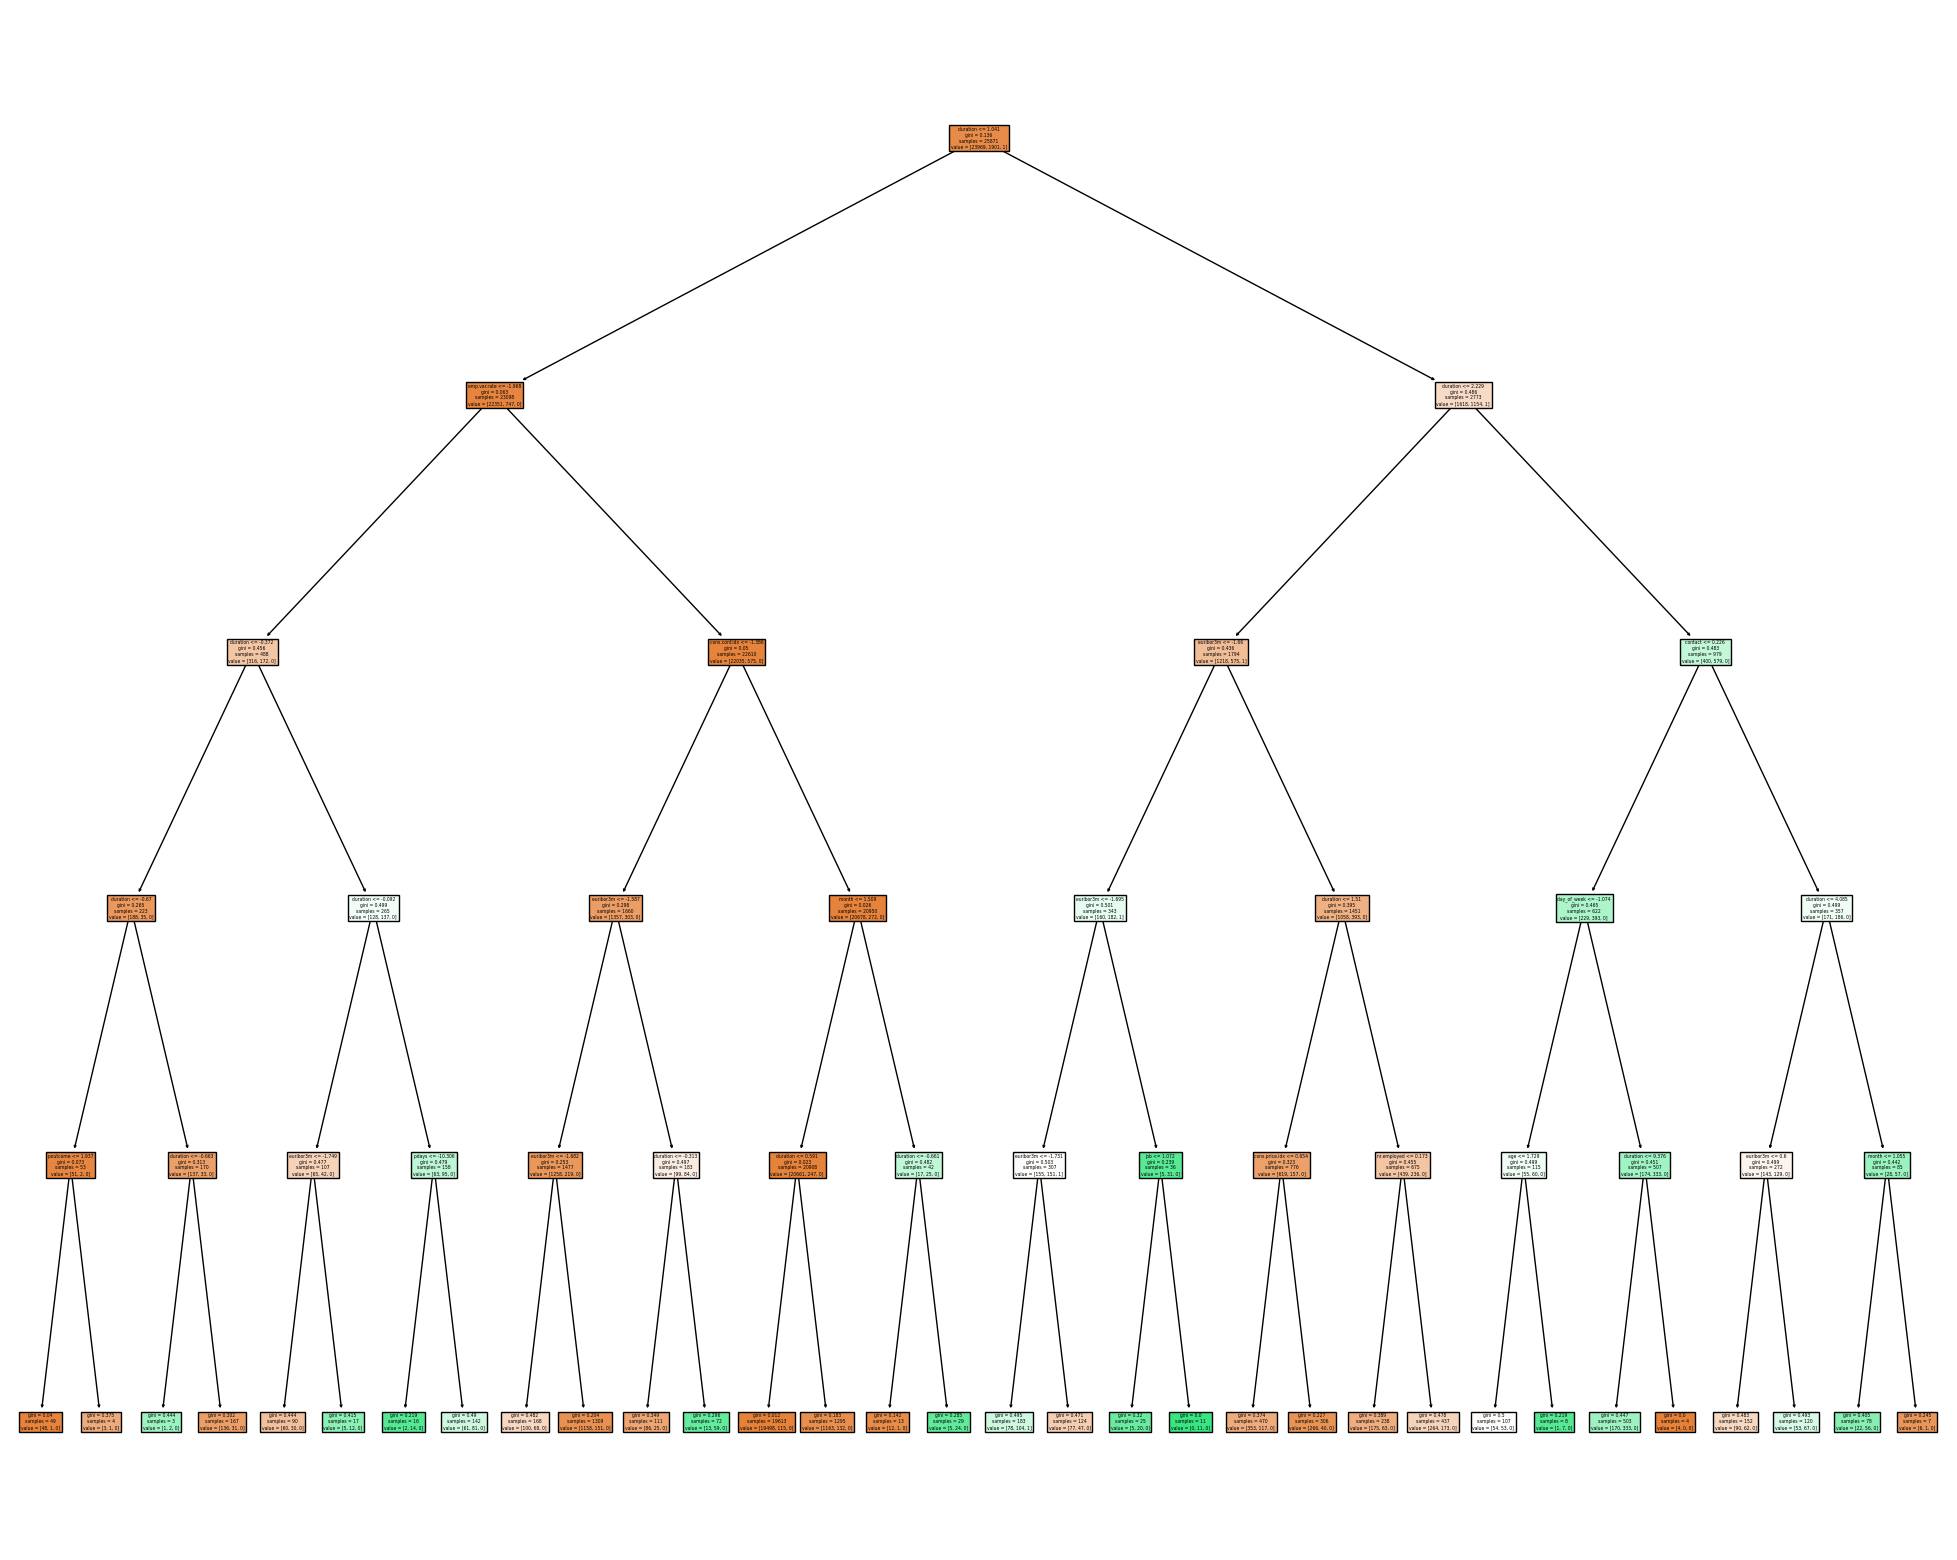

In [47]:
from sklearn import tree
fig = plt.figure(figsize=(25,20))
t= tree.plot_tree(clf,filled=True,feature_names=X.columns)